Ridge Regression MSE: 2811086088.51


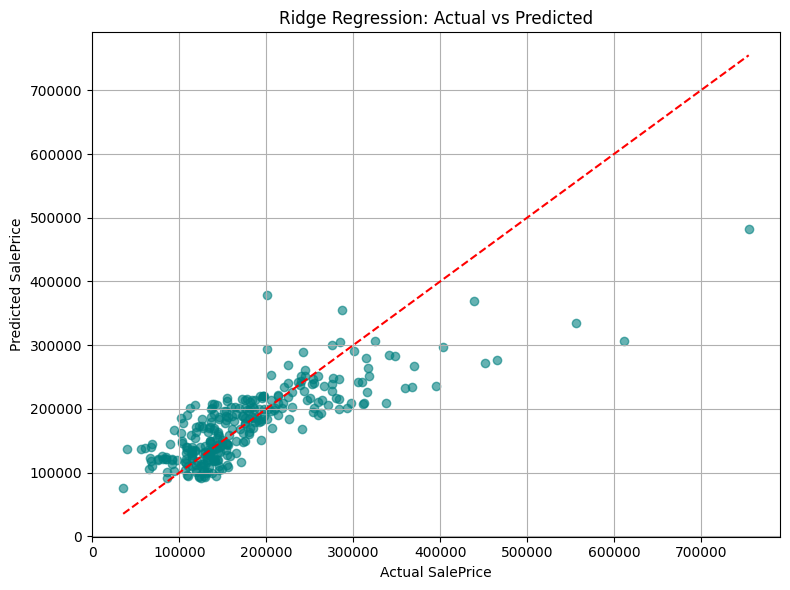

Submission file 'submission.csv' created.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('train.csv')

features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
X = train_data[features].fillna(0)
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Ridge Regression MSE: {mse:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Ridge Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

test_data = pd.read_csv('test.csv')
X_new = test_data[features].fillna(0)
predictions = ridge_model.predict(X_new)

submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created.")